<img src="elo.jpg" alt="Alt text that describes the graphic" title="Title text" />

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

<h1><center>Exploratory Data Analysis</center></h1>

1. Import libraries
2. Read files in Pandas Dataframe
3. Examine data, perform small data cleaning steps
4. Check for null values
5. Better understand the data through novel vizualizations
***

In [97]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [98]:
hist_trans = pd.read_csv('historical_transactions.csv')

In [99]:
new_merchants = pd.read_csv('new_merchant_transactions.csv')

In [100]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


1. The target value appears to be in logarithmic form
2. The features are all anomymous besides the registration date
3. There are few features to predict the loyalty score on

In [101]:
train.isnull().values.any() # Dataframe contains no null values, neat! 

False

In [102]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [103]:
for df in [train, test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

**Converting the first active month column into datetime format, and seperating the year and month into seperate columns so that we can inspect if theres any significance to month a user began**

In [104]:
train.head(2)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396


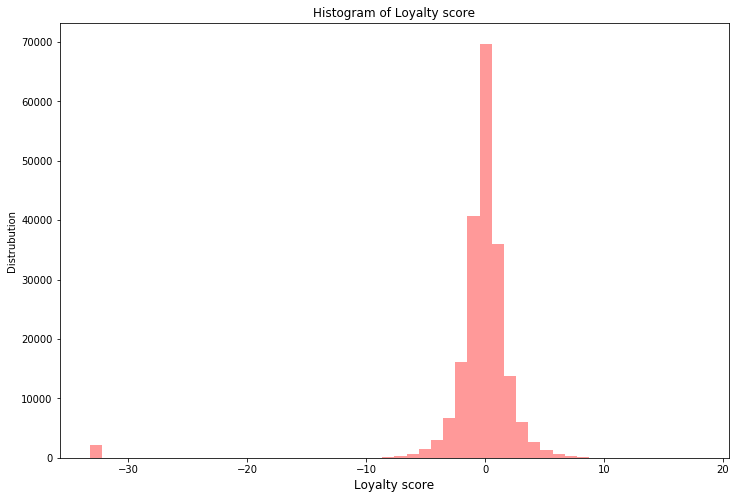

In [105]:
plt.figure(figsize=(12,8))
sns.distplot(train.target.values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.ylabel('Distrubution')
plt.show()

In [106]:
low_target = train.target < -30
low_target.value_counts()

False    199710
True       2207
Name: target, dtype: int64

**1% of the observations in the training set have an outlier targrt value of -33. Why is there a spike in target values at -33 and no where else. Perhaps there is a reason for this. But for model prediction these values maybe should be excluded**

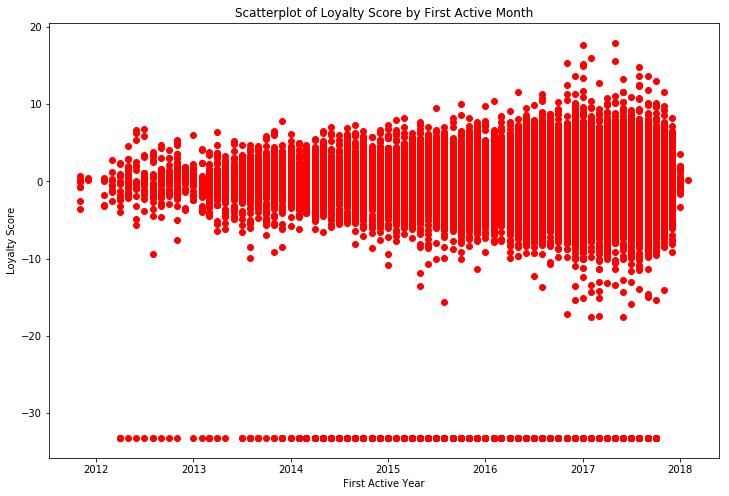

In [107]:
plt.figure(figsize=(12,8))
plt.plot_date(data=train, x='first_active_month', y='target', color= 'red')
plt.title('Scatterplot of Loyalty Score by First Active Month')
plt.xlabel('First Active Year')
plt.ylabel('Loyalty Score')
plt.show()

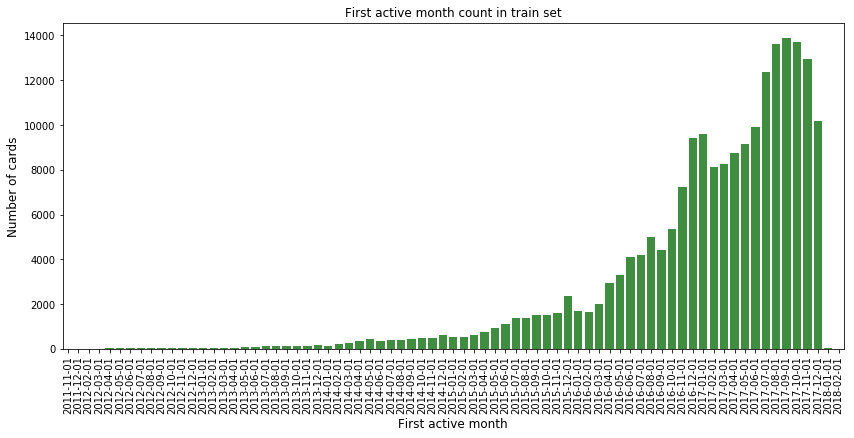

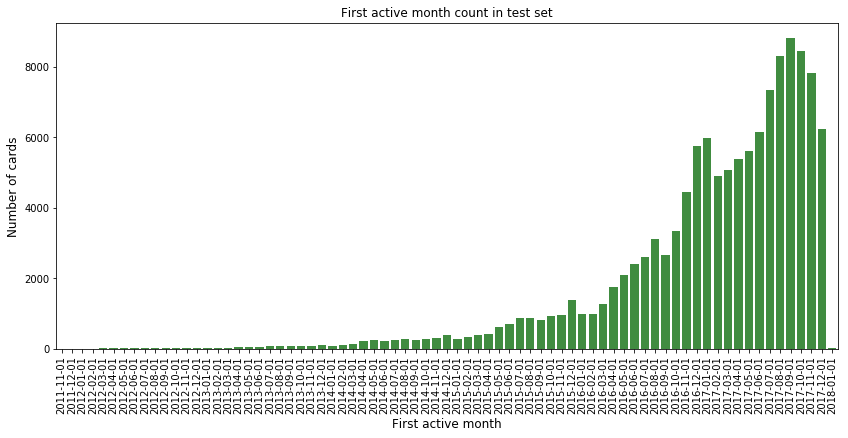

In [108]:
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

### The distrubution between the two sets appear similar <br>

In [109]:
hist_trans.head(3) #Contains information about the cusotmer transaction

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37


In [110]:
new_merchants.head(3) 
# contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) 
# over a period of two months.

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14


#  **Column Descriptions**

***
card_id - Card identifier<br>

month_lag - month lag to reference date<br>

purchase_date - Purchase date<br>

authorized_flag - 'Y' if approved, 'N' if denied<br>

category_3 - anonymized category<br>

installments - number of installments of purchase<br>

category_1 - anonymized category<br>

merchant_category_id - Merchant category identifier (anonymized )<br>

subsector_id - Merchant category group identifier (anonymized )<br>

merchant_id - Merchant identifier (anonymized)<br>

purchase_amount - Normalized purchase amount<br>

city_id - City identifier (anonymized )<br>

state_id - State identifier (anonymized )<br>

category_2 - anonymized category<br>


In [111]:
hist_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [112]:
new_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


<h1><center>Data Cleaning & Transformation</center></h1> 

***

In [113]:
hist_trans['authorized_flag'] = hist_trans['authorized_flag'].map({'Y':1, 'N':0})
hist_trans['category_1'] = hist_trans['category_1'].map({'Y':1, 'N':0})
hist_trans['category_3'] = hist_trans['category_3'].map({'A':1, 'B':2, 'C':3})
hist_trans = hist_trans.dropna()

new_merchants['authorized_flag'] = new_merchants['authorized_flag'].map({'Y':1, 'N':0})
new_merchants['category_1'] = new_merchants['category_1'].map({'Y':1, 'N':0})
new_merchants['category_3'] = new_merchants['category_3'].map({'A':1, 'B':2, 'C':3})
new_merchants = new_merchants.dropna()

hist_and_new = [hist_trans, new_merchants] 
Transactions = pd.concat(hist_and_new, keys=['Not_new', 'New_Merchant'])

# Created dummy variables for the string or category data type features 
# Dropped observations with missing values since there are few
# Concat the two files into one pandas dataframe

In [ ]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max'],
        'category_1': ['sum', 'mean'],
        'category_2': ['sum', 'mean'],
        'category_3': ['sum', 'mean']

        }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True) 
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

# Performs a large groupby, based off each unique customer ID, creating new statistical features 
# based off of existing features for our data to train on. 

In [ ]:
grouped_transactions = aggregate_historical_transactions(Transactions)

#Used function do add features to Transactions, which was origininally the historical and new transaction datasets

new_train = pd.merge(train, grouped_transactions, on='card_id', how='left')
new_test = pd.merge(test, grouped_transactions, on='card_id', how='left')

#Merged these with the training and testing datasets

new_train = new_train.dropna()
new_test = new_test.dropna()

#Double checking that all NAN observations are dropped.

In [ ]:
new_train.head(3)

<h1><center>Validation Set</center></h1> 

1. Create a validation set from the training set <br>
2. Set it to a different time frame from the remaining training data in this case <br>
3. Use __[Featexp](https://github.com/abhayspawar/featexp)__ to examine the distbrution of the other features <br>
   as well as to compare the trends the features display with the target variable: loyalty score.
4. Use __[Featexp](https://github.com/abhayspawar/featexp)__ to then examine the trend correlation between the training <br>
   data and the validation data. This will help to determine how well the feature's impact on the loyalty score holds true 
   no matter how diverse (in our example how long ago the customer first signed up) will be.
5. Limit the features to use on our machine learning model to those with high trend correlations between <br>
   the training and validation data.

***

In [ ]:
valid_mask = (new_train.elapsed_time < 100) | (new_train.elapsed_time > 800)
valid_mask.value_counts()

# Our validation data will be customers who have been users for less than 100 days and over 800 days, which is 39,837 users

In [ ]:
valid = new_train[valid_mask]
valid.shape #Sanity check

In [ ]:
train2_mask = (new_train.elapsed_time >= 100) & (new_train.elapsed_time <= 800)
train2 = new_train[train2_mask]
train2.shape #sanity check

#The remaining values are our training data for this analysis step

In [ ]:
from featexp import get_univariate_plots


get_univariate_plots(data=train2, #Doesn't accept non-integer data types
                     target_col='target', data_test=valid, 
                     features_list=[
                         
       'card_id', 'feature_1', 'feature_2', 'feature_3',
       'year', 'month', 'elapsed_time', 'hist_transactions_count',
       'hist_authorized_flag_sum', 'hist_authorized_flag_mean',
       'hist_merchant_id_nunique', 'hist_city_id_nunique',
       'hist_purchase_amount_sum', 'hist_purchase_amount_median',
       'hist_purchase_amount_max', 'hist_purchase_amount_min',
       'hist_purchase_amount_std', 'hist_installments_sum',
       'hist_installments_median', 'hist_installments_max',
       'hist_installments_min', 'hist_installments_std',
       'hist_purchase_date_ptp', 'hist_month_lag_min', 'hist_month_lag_max',
       'hist_category_1_sum', 'hist_category_1_mean', 'hist_category_2_sum',
       'hist_category_2_mean', 'hist_category_3_sum', 'hist_category_3_mean'
                         
                     ], bins=10)

In [ ]:
from featexp import get_trend_stats
stats = get_trend_stats(data=train2.drop('first_active_month', axis=1),
                        target_col='target', 
                        data_test=valid.drop('first_active_month', axis=1))

In [ ]:
stats = stats.sort_values(by='Trend_correlation', ascending=False)
stats

In [ ]:
top15 = stats.Feature.iloc[0:15]
top15 = top15.values
top15

X_train_15 = new_train[top15] #Limited the training data to the features that made 
                              #it in the top 15 when it came to trend correlation
y_train = new_train.target    #Target Value

X_train_15 = new_train[top15]

y_train = new_train.target
X_test_15 = new_test[top15] # Same for test set

<h1><center>Variance Inflation Factor</center></h1> 

Use __[Variance Inflation Factor](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)__ which  displays the level of multicolinearity between the features. This is helpful in eliminating features that are causing the same  variation in a dataset.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_15.values, i) for i in range(X_train_15.shape[1])]
vif["features"] = X_train_15.columns

In [ ]:
vif.round(1)

We can see some high variance inflation going on, so we'll drop these features and test the VIF again.

In [ ]:
X_train2 = X_train_15.drop(['hist_purchase_date_ptp', 'hist_purchase_amount_sum','hist_authorized_flag_mean',
                         'hist_month_lag_min', 'year',
                         'hist_category_3_sum', 'hist_transactions_count'], axis=1)

In [ ]:
X_test2 = X_test_15.drop(['hist_purchase_date_ptp', 'hist_purchase_amount_sum', 'hist_authorized_flag_mean',
                        'hist_month_lag_min', 'year',
                        'hist_category_3_sum', 'hist_transactions_count'], axis=1)

In [ ]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif2["features"] = X_train2.columns

vif2.round(1)

#If values are greater than 5, they should be dropped as they are indicating multicolinearity

<h1><center>Model Prediction with XGB</center></h1> 
<h2><center>(Attempt 1)</center></h2> 

1. Importing the needed libraries
2. Instantiating XGB Regression and set the hyperparameters
3. Fit, Predict
4. Perform Cross validation and find the best acheived Root Mean Squared Error score, the metric for the Kaggle Competition

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train2,label=y_train) #Improves the performance and efficiency of the model

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=70,early_stopping_rounds=20,metrics="rmse", as_pandas=True, seed=123)

# Shortened features to top 15 with highest trend correlation
# Then eliminated features with high variation inflation factor, aka high multicolinearity

In [ ]:
cv_results.tail(1)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train2,y_train)

preds = xg_reg.predict(X_test2)

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
xgb.plot_importance(xg_reg)
plt.show()

<h2><center>(Attempt 2)</center></h2> 

<h3><center>(All features from Aggregrate Groupby)</center></h3>

In [ ]:
new_test.columns

In [ ]:
new_train = new_train.drop(['first_active_month', 'card_id', 'target'], axis=1)
y_test = new_test.drop(['first_active_month', 'card_id'], axis=1)

In [ ]:
data_dmatrix_all = xgb.DMatrix(data=new_train,label=y_train) 

cv_results_all = xgb.cv(dtrain=data_dmatrix_all, params=params, nfold=3,
                    num_boost_round=70,early_stopping_rounds=20,metrics="rmse", as_pandas=True, seed=123)

#All features created by the groupby function

In [ ]:
cv_results_all.tail(1)

In [ ]:
xg_reg.fit(new_train, y_train)

preds = xg_reg.predict(y_test)

**Including all the features created by the groupby function, aggregrate_historical_transactions, did improve the rmse score on the test set, but not as greatly as limiting only to the top 15 features that held the greatest trend correlation among the training and validation set, obtained through featexp's get_trend_stats module.**